<a href="https://colab.research.google.com/github/mohammadehsanii/Voice_Detection/blob/main/dataMining1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Mining for Turkish Music Emotion Dataset**

### Prof. Giuseppe Longo and Prof. Roberta Siciliano.

*   Rabia Simal Capar
*   Hawzhin Tohidi
*   Mohammad Ehsani



# Introduction
This project aims to perform data preprocessing, analysis, dimensionality reduction, and model building on a dataset of Turkish music emotions using neural networks.

The dataset contains acoustic features and corresponding emotions (classes).

The project focuses on exploring the dataset, handling missing data, visualizing important features, applying Principal Component Analysis (PCA), and building a neural network classifier to predict the emotional class of the music samples.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l2

import warnings

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset Description
Source: The dataset used in this project is available from Google Drive.
File: Acoustic Features.csv


Target Variable: Class, representing the emotional class of music.


Features: Acoustic features such as _RMSenergy_Mean, _Lowenergy_Mean, _Fluctuation_Mean, etc.

In [ ]:
file_directory = '/content/drive/My Drive/DataMining_Project/Acoustic Features.csv'


# Load the dataset

raw_data = pd.read_csv(file_directory)

In [ ]:
raw_data2 = raw_data.copy()

# Shape and dimention of our raw dataset

In [ ]:
raw_data.shape

(400, 51)

# Prerview of Dataset

In [ ]:
raw_data.head()

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957


# Statistical  description of our Dataset

In [ ]:
raw_data.describe()

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.134650,0.553605,7.145932,123.682020,2.456422,0.071890,0.488065,0.030465,0.178897,0.038307,...,0.354632,0.590975,0.342340,0.385620,0.328213,0.192997,-0.000157,1.762288,0.769690,0.966712
std,0.064368,0.050750,2.280145,34.234344,0.799262,0.537865,0.294607,0.275839,0.195230,0.203754,...,0.334976,0.357981,0.315808,0.348117,0.055520,0.047092,0.104743,0.930352,0.072107,0.003841
min,0.010000,0.302000,3.580000,48.284000,0.323000,-3.484000,-0.870000,-1.636000,-0.494000,-0.916000,...,0.000000,0.000000,0.000000,0.000000,0.112000,0.060000,-0.285000,0.187000,0.530000,0.939000
25%,0.085000,0.523000,5.859500,101.490250,1.948500,-0.262750,0.281250,-0.117000,0.061250,-0.078250,...,0.066750,0.264500,0.059500,0.060750,0.290750,0.160000,-0.058000,0.961000,0.725000,0.965000
50%,0.128000,0.553000,6.734000,120.132500,2.389500,0.068500,0.464500,0.044500,0.181000,0.049500,...,0.247000,0.612000,0.247000,0.296500,0.333000,0.190000,-0.002000,1.682000,0.786000,0.967000
75%,0.174000,0.583250,7.823500,148.986250,2.860250,0.413250,0.686000,0.198250,0.288500,0.151250,...,0.612000,1.000000,0.565250,0.670750,0.367250,0.226000,0.063250,2.243000,0.824000,0.969000
max,0.431000,0.703000,23.475000,195.026000,5.996000,1.937000,1.622000,1.126000,1.055000,0.799000,...,1.000000,1.000000,1.000000,1.000000,0.488000,0.340000,0.442000,4.486000,0.908000,0.977000


In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Class                                           400 non-null    object 
 1   _RMSenergy_Mean                                 400 non-null    float64
 2   _Lowenergy_Mean                                 400 non-null    float64
 3   _Fluctuation_Mean                               400 non-null    float64
 4   _Tempo_Mean                                     400 non-null    float64
 5   _MFCC_Mean_1                                    400 non-null    float64
 6   _MFCC_Mean_2                                    400 non-null    float64
 7   _MFCC_Mean_3                                    400 non-null    float64
 8   _MFCC_Mean_4                                    400 non-null    float64
 9   _MFCC_Mean_5                               

In [ ]:
# Categorical variable

categorical = [var for var in raw_data.columns if raw_data[var].dtype=='object']

print('There are {} categorical variable\n'.format(len(categorical)))

print('The categorical variables is :', categorical)

There are 1 categorical variable

The categorical variables is : ['Class']


In [ ]:
# Numerical variables

numerical = [var for var in raw_data.columns if raw_data[var].dtype in ['float64', 'int64']]

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are:', numerical)

There are 50 numerical variables

The numerical variables are: ['_RMSenergy_Mean', '_Lowenergy_Mean', '_Fluctuation_Mean', '_Tempo_Mean', '_MFCC_Mean_1', '_MFCC_Mean_2', '_MFCC_Mean_3', '_MFCC_Mean_4', '_MFCC_Mean_5', '_MFCC_Mean_6', '_MFCC_Mean_7', '_MFCC_Mean_8', '_MFCC_Mean_9', '_MFCC_Mean_10', '_MFCC_Mean_11', '_MFCC_Mean_12', '_MFCC_Mean_13', '_Roughness_Mean', '_Roughness_Slope', '_Zero-crossingrate_Mean', '_AttackTime_Mean', '_AttackTime_Slope', '_Rolloff_Mean', '_Eventdensity_Mean', '_Pulseclarity_Mean', '_Brightness_Mean', '_Spectralcentroid_Mean', '_Spectralspread_Mean', '_Spectralskewness_Mean', '_Spectralkurtosis_Mean', '_Spectralflatness_Mean', '_EntropyofSpectrum_Mean', '_Chromagram_Mean_1', '_Chromagram_Mean_2', '_Chromagram_Mean_3', '_Chromagram_Mean_4', '_Chromagram_Mean_5', '_Chromagram_Mean_6', '_Chromagram_Mean_7', '_Chromagram_Mean_8', '_Chromagram_Mean_9', '_Chromagram_Mean_10', '_Chromagram_Mean_11', '_Chromagram_Mean_12', '_HarmonicChangeDetectionFunction_Mean',

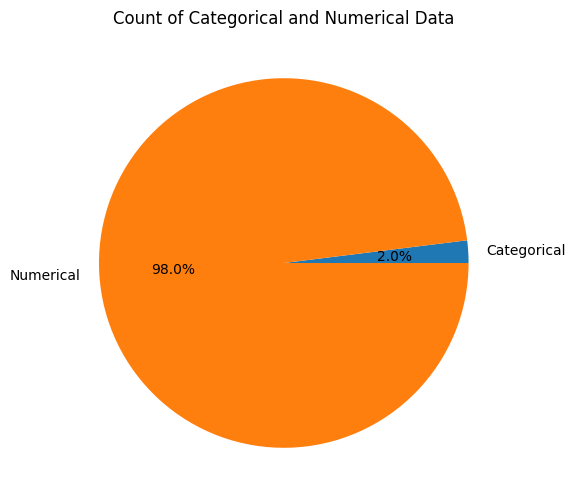

In [ ]:
# Define categorical and numerical data
categorical_count = len(categorical)
numerical_count = len(numerical)

# Calculate total data points
total = categorical_count + numerical_count

# Calculate percentages
categorical_percent = (categorical_count / total) * 100
numerical_percent = (numerical_count / total) * 100

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie([categorical_percent, numerical_percent], labels=["Categorical", "Numerical"], autopct="%1.1f%%")
plt.title("Count of Categorical and Numerical Data")
plt.show()

In [ ]:
# Handeling Missing Values

data_type = pd.DataFrame(raw_data.dtypes , columns = ["Data Types"])
count_nulls = pd.DataFrame(raw_data.isnull().sum(), columns = ["Nulls Count"])

dfNull = pd.concat([data_type, count_nulls], axis = 'columns')
dfNull

,Data Types,Nulls Count
Class,object,0
_RMSenergy_Mean,float64,0
_Lowenergy_Mean,float64,0
_Fluctuation_Mean,float64,0
_Tempo_Mean,float64,0
_MFCC_Mean_1,float64,0
_MFCC_Mean_2,float64,0
_MFCC_Mean_3,float64,0
_MFCC_Mean_4,float64,0
_MFCC_Mean_5,float64,0


As we can see, we dont have any missing value

In [ ]:
# Drop duplicates (entire rows considered as duplicates)
cleaned_data = raw_data.drop_duplicates()

In [ ]:
# Class distribution
class_distribution = cleaned_data['Class'].value_counts(normalize=True) * 100

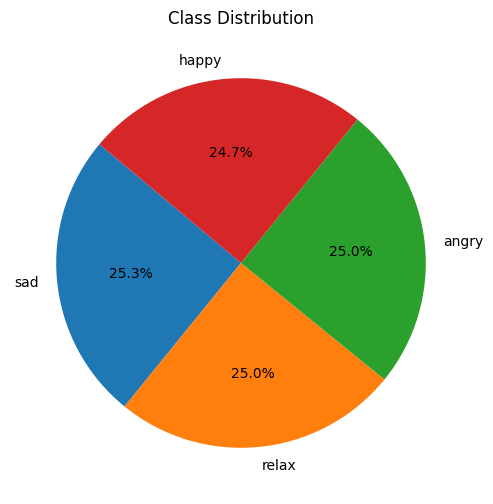

In [ ]:
# Plot the pie chart
plt.figure(figsize=(8, 6))  # Optional: adjust the size of the chart
plt.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.show()


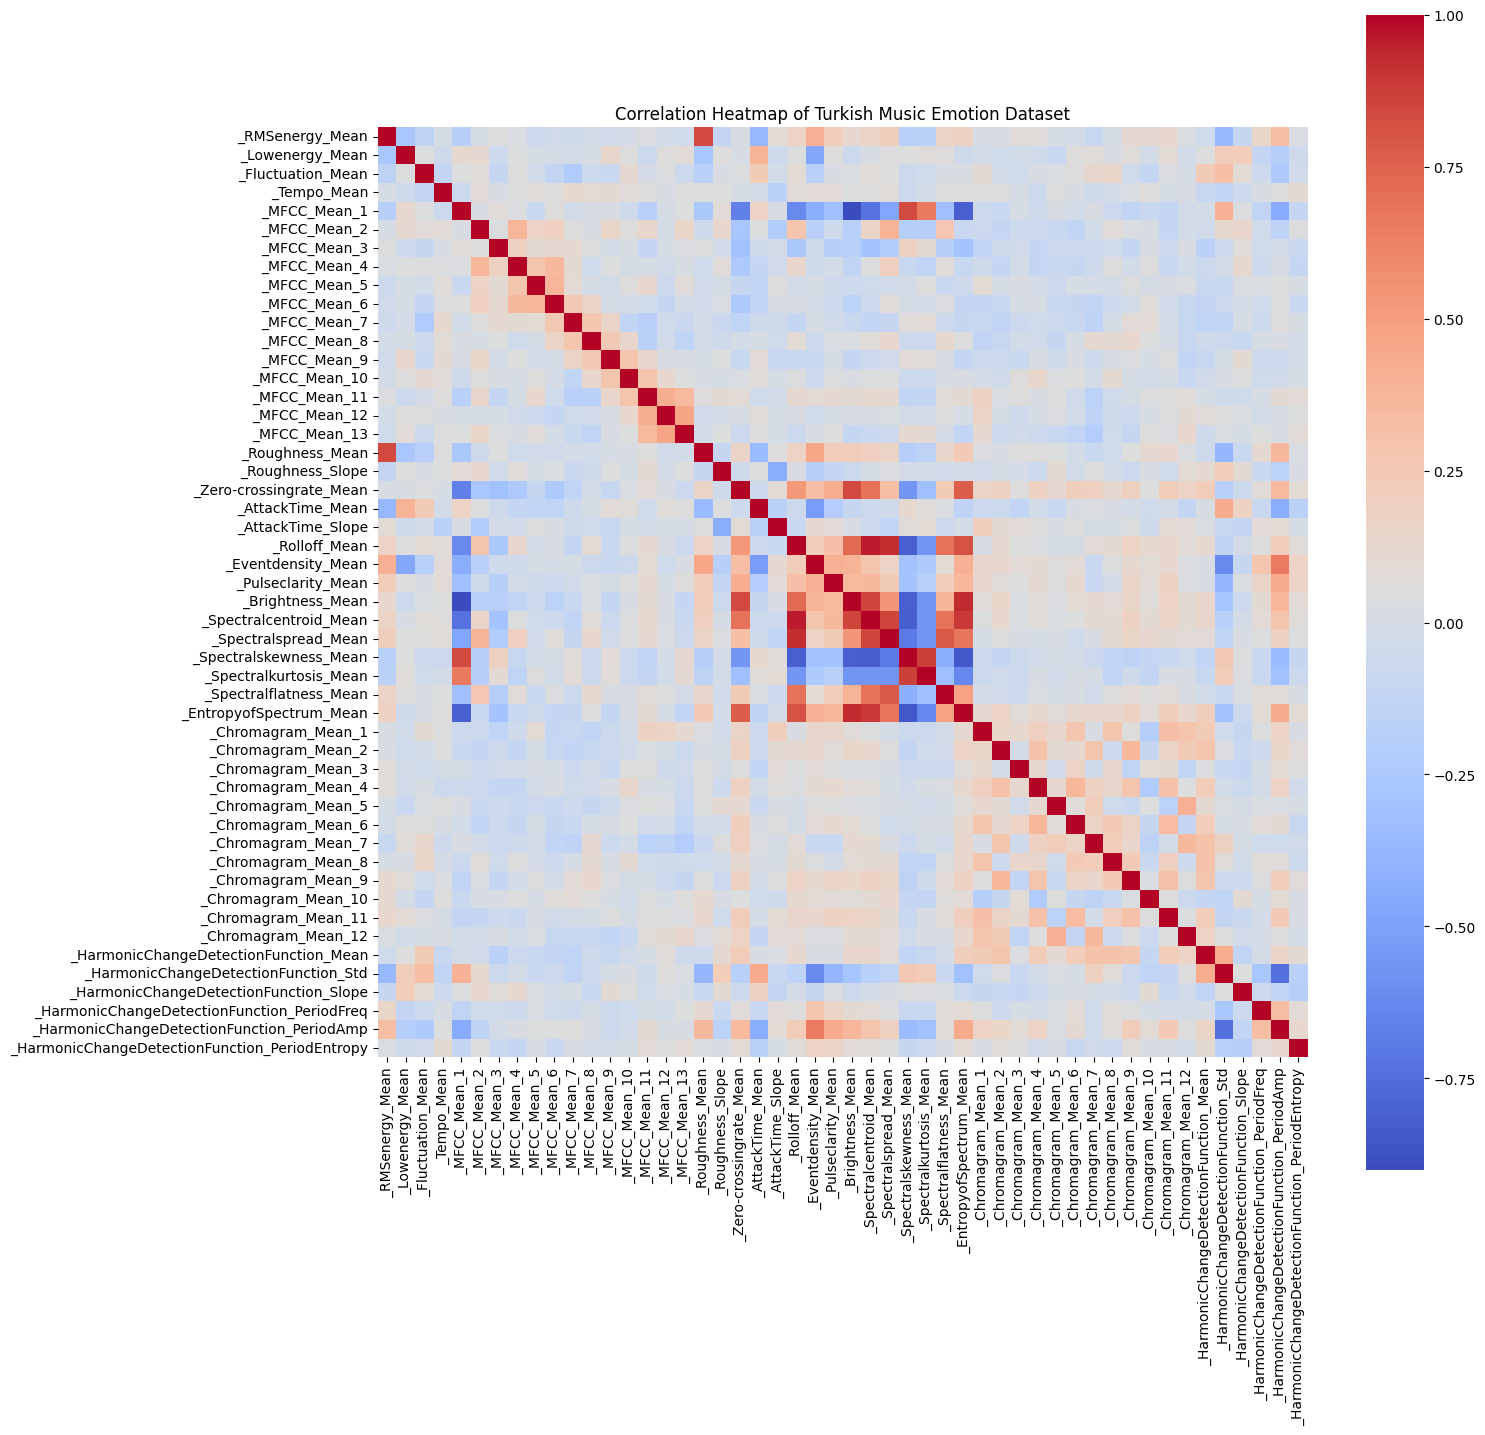

In [ ]:
# Calculate the correlation matrix
correlation = cleaned_data.iloc[:, 1:].corr()


# Plot the heatmap
plt.figure(figsize=(15,15))
plt.title('Correlation Heatmap of Turkish Music Emotion Dataset')
ax = sns.heatmap(correlation, square=True, annot=False , fmt='.2f', linecolor='white', cmap='coolwarm')
plt.show()

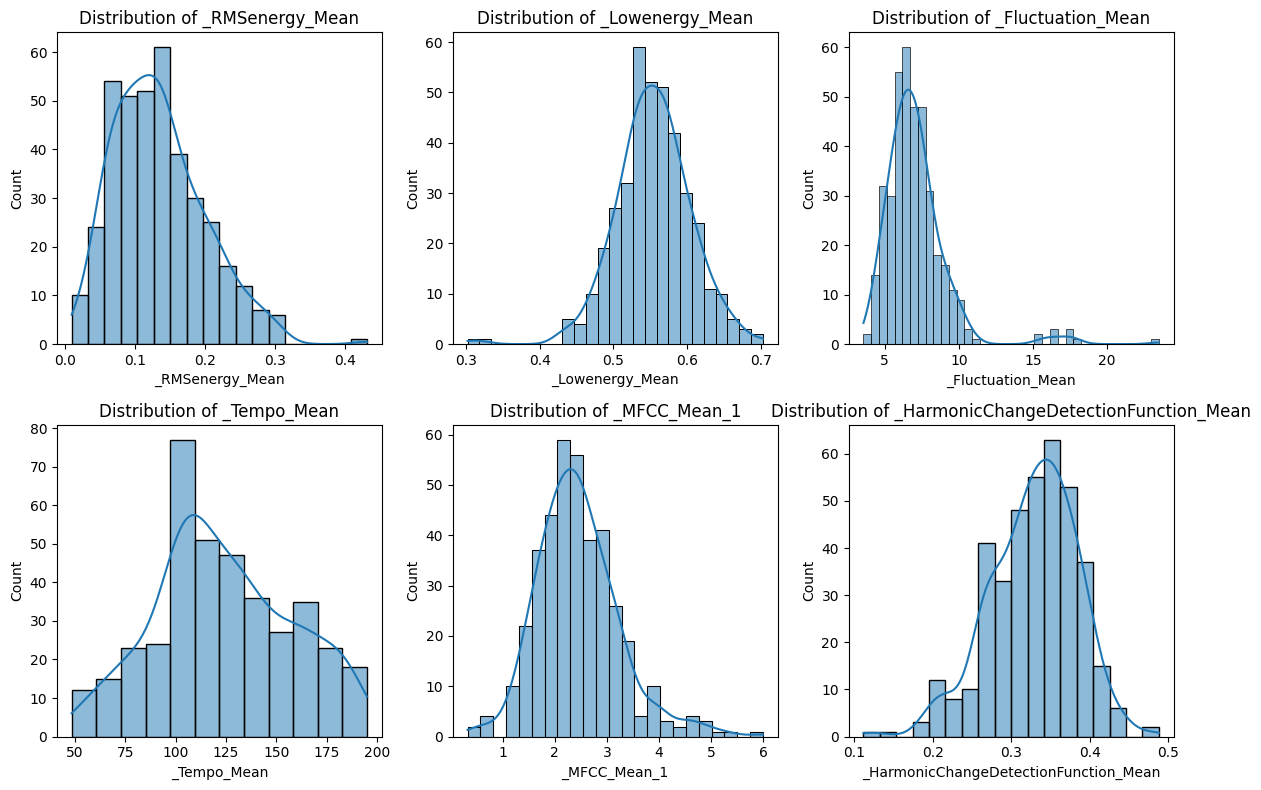

In [ ]:
# Features to visualize
features = ['_RMSenergy_Mean', '_Lowenergy_Mean', '_Fluctuation_Mean', '_Tempo_Mean', '_MFCC_Mean_1', '_HarmonicChangeDetectionFunction_Mean', ]

# Plot distributions
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(cleaned_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode the 'Class' column(categorical to numerical)
LabelEncoder = LabelEncoder()
cleaned_data['Class_encoded'] = LabelEncoder.fit_transform(cleaned_data['Class'])

In [ ]:
# List of columns to drop for preparing dataset for scaling

new_df = cleaned_data.drop(columns=['Class'])


In [ ]:
# Standardize the features
scaler = StandardScaler()

# Fit the scaler to your data
scaler.fit(new_df)

# Transform the data
scaled_series = scaler.transform(new_df)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_series, columns=new_df.columns)



In [ ]:
scaled_df.head() #test

,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,_MFCC_Mean_6,...,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy,Class_encoded
0,-1.274507,0.725485,0.911507,0.184724,1.943097,0.534220,1.344443,0.176412,0.194581,0.384232,...,1.144989,-1.064889,-0.826912,-0.221327,1.449179,0.166848,-0.796016,-2.451158,0.850322,0.441698
1,-0.141452,-2.273477,-0.198711,0.543542,2.019764,0.818446,0.999637,1.322177,1.912650,3.705513,...,1.144989,-1.090333,1.698006,-0.780243,0.384696,-0.792504,1.703608,-0.936992,0.074636,0.441698
2,-1.367635,1.672526,1.563353,1.894266,0.407246,1.537372,0.042970,1.077939,0.533067,0.491528,...,0.436412,-1.039445,1.743757,1.527540,2.258187,1.279696,-0.101617,-1.075906,-0.959611,0.441698
3,0.013761,0.962245,1.501875,-1.699595,0.490197,2.743012,0.414819,1.156957,-0.882417,0.506159,...,1.144989,-0.578275,1.048904,1.689806,1.534338,0.397093,-1.526907,-0.367443,0.333198,0.441698
4,-1.057209,0.725485,1.197650,-1.025939,0.962767,0.283432,1.097670,0.241063,1.286966,1.198702,...,-0.517657,2.090153,-1.112859,0.301530,1.449179,0.847988,-1.104042,-1.325952,-2.510982,0.441698


In [ ]:
# Apply PCA

# Instantiate the PCA object
pca = PCA(n_components=2)  # You can change the number of components

# Fit and transform the data
X_pca = pca.fit_transform(scaled_series)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])

# Add the target variable back to the DataFrame
pca_df = pd.concat([pca_df, new_df['Class_encoded']], axis=1)


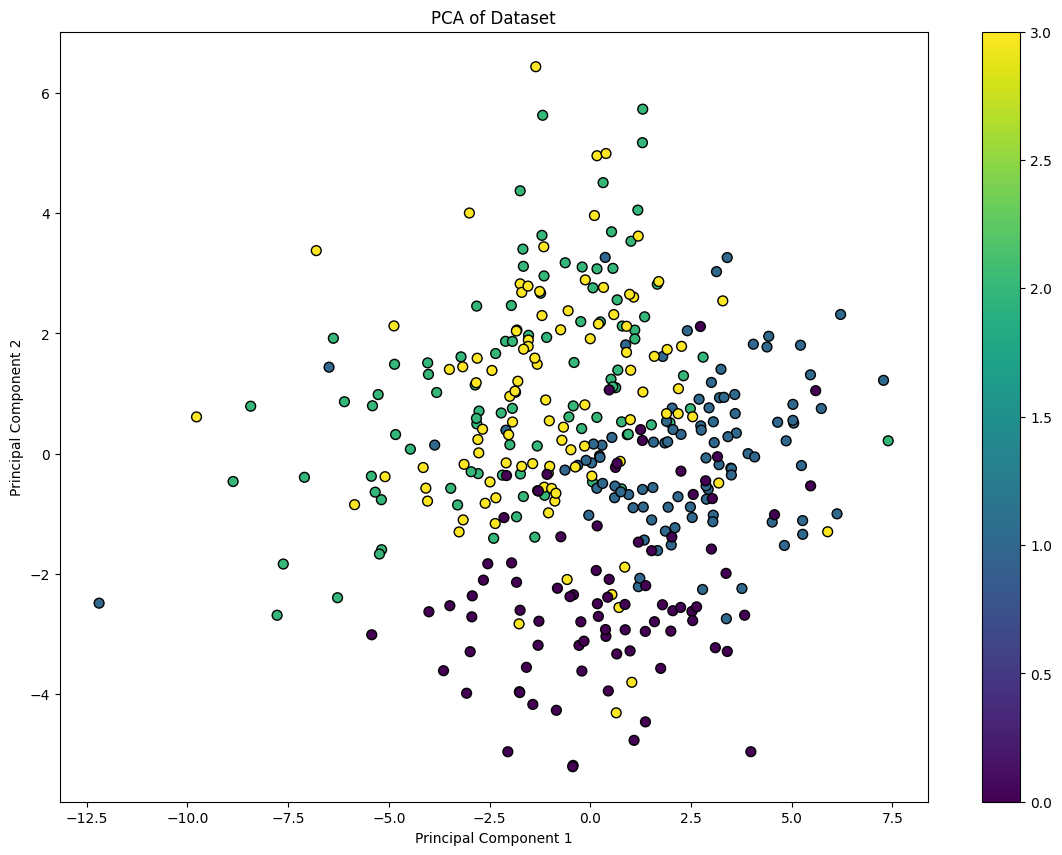

In [ ]:
# Plotting the 2D PCA result
plt.figure(figsize=(14, 10))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=pca_df['Class_encoded'], cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.colorbar()
plt.show()


In [ ]:
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')
print(f'Cumulative explained variance: {np.cumsum(explained_variance)}')


Explained variance by each component: [0.16793033 0.08176993]
Cumulative explained variance: [0.16793033 0.24970026]


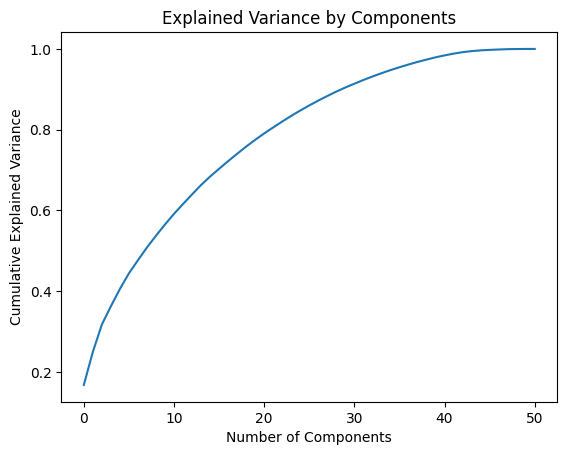

In [ ]:
pca = PCA().fit(scaled_series)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.show()


# Prepare the Data
Split the data into features (X) and target (y), then split them into training and testing sets:

In [ ]:
# Split the data into features and target
X = cleaned_data.drop(['Class', 'Class_encoded'], axis=1)
y = cleaned_data['Class_encoded']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)



In [ ]:
# Convert target variables to one-hot encoding for neural networks
y_train_nn = to_categorical(y_train)
y_test_nn = to_categorical(y_test)


# Build the Neural Network Model

In [ ]:
# Initialize the neural network
model = Sequential()

# Input layer and the first hidden layer
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.3))  # Dropout to reduce overfitting

# Second hidden layer with LeakyReLU
model.add(Dense(128, kernel_regularizer=l2(0.001)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Third hidden layer
model.add(Dense(64, kernel_regularizer=l2(0.001)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer (number of units = number of unique classes)
model.add(Dense(y_train_nn.shape[1], activation='softmax'))

# Compile the Model

In [ ]:
# Compile the model with Adam optimizer and adjusted learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Set early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# Train the Model

In [ ]:
# Train the model with validation and early stopping
history = model.fit(X_train, y_train_nn, epochs=100, batch_size=32, validation_data=(X_test, y_test_nn), callbacks=[early_stopping])


Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.2895 - loss: 2.3623 - val_accuracy: 0.6154 - val_loss: 1.5100
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5012 - loss: 1.5715 - val_accuracy: 0.6795 - val_loss: 1.3680
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6623 - loss: 1.2513 - val_accuracy: 0.7308 - val_loss: 1.2679
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6583 - loss: 1.1453 - val_accuracy: 0.7564 - val_loss: 1.1953
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7306 - loss: 0.9840 - val_accuracy: 0.7564 - val_loss: 1.1365
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7467 - loss: 1.0107 - val_accuracy: 0.7308 - val_loss: 1.0867
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7689 - loss: 0.9557 - val_accuracy: 0.7821 - val_loss: 1.0354
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7713 - loss: 0.9005 - val_accuracy: 0.

# Evaluate the Model

In [ ]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test_nn)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9043 - loss: 0.6130 
Test Accuracy: 91.03%


# Visualize Training Progress
Plot the training and validation accuracy over epochs to see if the model is improving.

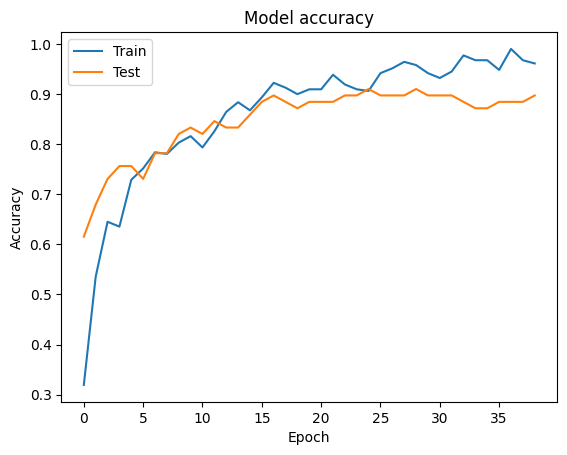

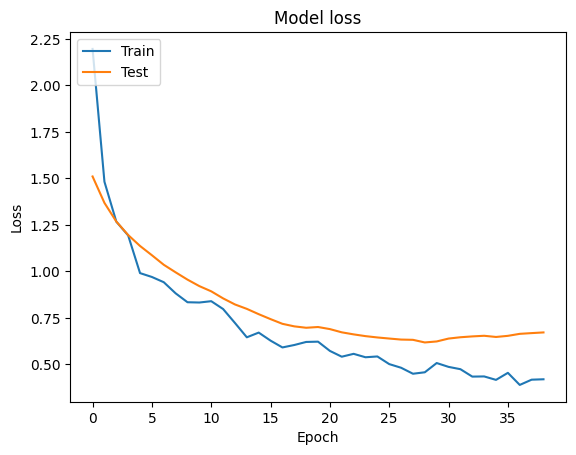

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


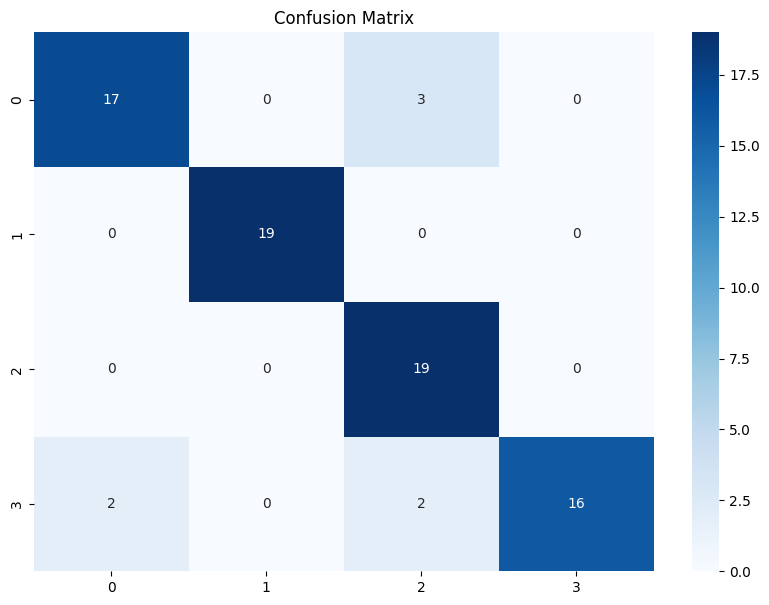

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       1.00      1.00      1.00        19
           2       0.79      1.00      0.88        19
           3       1.00      0.80      0.89        20

    accuracy                           0.91        78
   macro avg       0.92      0.91      0.91        78
weighted avg       0.92      0.91      0.91        78



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred_classes))


In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
import numpy as np
import joblib

# Saving the model
model.save('music_emotion_model.h5')

# Save the scaler
joblib.dump(scaler, 'scaler.joblib')


['scaler.joblib']

In [ ]:
# Load the model and scaler
modelApp = load_model('music_emotion_model.h5')
scalerApp = joblib.load('scaler.joblib')


In [ ]:
import librosa
import numpy as np

def extract_features_from_song(file_path):
    y, sr = librosa.load(file_path, sr=None)

    # Feature 2: RMS Energy
    rms_mean = np.mean(librosa.feature.rms(y=y))

    # Feature 3: Low Energy (Fraction of energy below a certain threshold, custom calculation)
    low_energy_threshold = 0.1 * np.max(np.abs(y))  # Threshold for low energy (e.g., 10% of max energy)
    low_energy_fraction = np.sum(np.abs(y) < low_energy_threshold) / len(y)

    # Feature 4: Fluctuation Mean (Placeholder for custom implementation)
    fluctuation_mean = np.mean(np.diff(y))  # Simplified version, you can implement a more sophisticated fluctuation metric

    # Feature 5: Tempo
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)

    # Features 6-18: MFCCs (13 coefficients)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs_means = np.mean(mfccs, axis=1)

    # Feature 19-20: Roughness (Placeholder for custom implementation)
    roughness_mean = np.mean(np.abs(np.diff(y)))  # Simplified version of roughness
    roughness_slope = np.mean(np.gradient(np.abs(np.diff(y))))  # Slope of roughness

    # Feature 21: Zero-Crossing Rate
    zero_crossing_rate_mean = np.mean(librosa.feature.zero_crossing_rate(y))

    # Features 22-23: Attack Time (Placeholder for custom implementation)
    attack_time_mean = np.mean(librosa.onset.onset_strength(y=y, sr=sr))  # Simplified attack time
    attack_time_slope = np.mean(np.gradient(librosa.onset.onset_strength(y=y, sr=sr)))  # Slope of attack

    # Feature 24: Spectral Rolloff
    rolloff_mean = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))

    # Feature 25: Event Density (Placeholder for custom implementation)
    event_density_mean = np.mean(librosa.onset.onset_detect(y=y, sr=sr))  # Simplified version

    # Feature 26: Pulse Clarity (Placeholder for custom implementation)
    pulse_clarity_mean = np.mean(librosa.beat.tempo(y=y, sr=sr))  # Simplified pulse clarity

    # Feature 27: Brightness (represented by Spectral Centroid)
    brightness_mean = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))

    # Features 28-33: Spectral Features
    spectral_centroid_mean = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    spectral_spread_mean = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    spectral_skewness_mean = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr))
    spectral_kurtosis_mean = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr))
    spectral_flatness_mean = np.mean(librosa.feature.spectral_flatness(y=y))
    entropy_of_spectrum_mean = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr))

    # Features 34-45: Chromagram (12 chroma features)
    chromagram = librosa.feature.chroma_stft(y=y, sr=sr)
    chromagram_means = np.mean(chromagram, axis=1)

    # Features 46-51: Harmonic Change Detection Function (Placeholder for custom implementation)
    harmonic_change_detection_mean = np.mean(librosa.effects.harmonic(y))
    harmonic_change_detection_std = np.std(librosa.effects.harmonic(y))
    harmonic_change_detection_slope = np.mean(np.gradient(librosa.effects.harmonic(y)))
    harmonic_change_detection_period_freq = np.mean(librosa.beat.beat_track(y=y, sr=sr)[1])  # Beat frequency
    harmonic_change_detection_period_amp = np.mean(np.abs(np.diff(librosa.effects.harmonic(y))))
    harmonic_change_detection_period_entropy = entropy_of_spectrum_mean  # Reusing spectral entropy as a placeholder

    # Combine all features into a single array
    features = np.hstack([
        rms_mean, low_energy_fraction, fluctuation_mean, tempo, mfccs_means, roughness_mean, roughness_slope,
        zero_crossing_rate_mean, attack_time_mean, attack_time_slope, rolloff_mean, event_density_mean,
        pulse_clarity_mean, brightness_mean, spectral_centroid_mean, spectral_spread_mean, spectral_skewness_mean,
        spectral_kurtosis_mean, spectral_flatness_mean, entropy_of_spectrum_mean, chromagram_means,
        harmonic_change_detection_mean, harmonic_change_detection_std, harmonic_change_detection_slope,
        harmonic_change_detection_period_freq, harmonic_change_detection_period_amp, harmonic_change_detection_period_entropy
    ])

    return features


In [ ]:
# Path to the new song
file_path = '/content/drive/My Drive/DataMining_Project/testMusic.mp3'

# Extract features"
song_features = extract_features_from_song(file_path)

# Standardize the features (use the previously saved scaler)
song_features_scaled = scalerApp.transform([song_features])  # Ensure it's a 2D array for scaler


In [ ]:
# Perform prediction
prediction = modelApp.predict(song_features_scaled)

# Convert prediction to class label (emotion)
predicted_class = np.argmax(prediction, axis=1)  # This returns a scalar or array of predicted classes

# Wrap `predicted_class` in a list or array to make it compatible with LabelEncoder.inverse_transform()
emotion_class = LabelEncoder.inverse_transform([predicted_class])  # Convert to list or array

print(f"The predicted emotion for the song is: {emotion_class[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
The predicted emotion for the song is: angry
